In [4]:
from oa_dag.utils import json_load
import matplotlib.pyplot as plt

def draw_curve(fnames, labels):
    data_groups = [{
        k:v for k, v in json_load(fname).items() if int(k) < 100
    } for fname in fnames]
    
    # Plot the data
    plt.figure(figsize=(12, 8))

    for i, data_group in enumerate(data_groups):
        positions = list(data_group.keys())
        loss_values = list(data_group.values())
        positions = [int(pos) for pos in positions]
        plt.plot(positions, loss_values, marker='o', label=labels[i])

    plt.xscale('log')
    plt.title('Change of Loss Across Tokens at Different Positions (Logarithmic Scale)', fontsize=18)
    plt.xlabel('Token Position (Log Scale)', fontsize=18)
    plt.ylabel('Loss', fontsize=18)
    plt.grid(True, which="both", ls="--")
    plt.legend(fontsize=18)
    plt.show()

[2024-07-11 12:22:49,327] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/share/edc/home/yuxi_xie/miniconda3/envs/oa-dag/bin/../lib/gcc/x86_64-conda-linux-gnu/11.2.0/../../../../x86_64-conda-linux-gnu/bin/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


 [WARNING]  async_io requires the dev libaio .so object and headers but these were not found.
 [WARNING]  If libaio is already installed (perhaps from source), try setting the CFLAGS and LDFLAGS environment variables to where it can be found.
 [WARNING]  Please specify the CUTLASS repo directory as environment variable $CUTLASS_PATH
 [WARNING]  sparse_attn requires a torch version >= 1.5 and < 2.0 but detected 2.3
 [WARNING]  using untested triton version (2.3.1), only 1.0.0 is known to be compatible


In [30]:
# DIR = "/share/edc/home/yuxi_xie/oa_dag/checkpoints/v0628"
DIR = "/share/edc/home/yuxi_xie/oa_dag/checkpoints/v0705-math"

## MetaMATH

In [2]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(
    'mistralai/Mistral-7B-Instruct-v0.2',
)

/share/edc/home/yuxi_xie/miniconda3/envs/oa-dag/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
decoding_tracks = json_load(f'{DIR}/oa-denoiseonline-mu0.55-rmu1.0-r0.15/decoding_tracks_step_sample2.json')
# decoding_tracks = json_load(f'{DIR}/oa-denoiseonline-mu0.25to0.75-dymin-rmu1.0-r0.15/decoding_tracks_step_sample2.json')

In [38]:
idx = 4
print(decoding_tracks['outputs'][idx])
for i in range(len(decoding_tracks['tracks'][idx])):
    # if i < 50: continue
    start_idx = min(decoding_tracks['tracks'][idx][i][1])
    end_idx = max(decoding_tracks['tracks'][idx][i][1])
    if i < 5 or i % 10 == 0 or i > 50 or i > 0:
        print(f'[{i}]', tokenizer.decode([decoding_tracks['tracks'][idx][i][0][decoding_tracks['tracks'][idx][i][1].index(x)] if x in decoding_tracks['tracks'][idx][i][1] else 583 for x in range(start_idx, end_idx + 1)]))
    # print(''.join([tokenizer.decode([decoding_tracks['tracks'][idx][i][0][decoding_tracks['tracks'][idx][i][1].index(x)]]) if x in decoding_tracks['tracks'][idx][i][1] else '_' for x in range(start_idx, end_idx + 1)]))
    # print(decoding_tracks['tracks'][idx][i])

[INST] Mack wants to count things and decided to count how many birds there are in the sky over the next week. On days one and two, Mack saw a total of 50 birds. On day three he saw none. On days four and five, he saw 120 birds. On day six he saw 20 and on day seven he saw 90. On average, how many birds did Mack see in a day? [/INST]From day1 2, Mack saw a total of 50 + 5 = 100 birds.
From day3 5, Mack saw a total of 120 + 120 = 240 birds.
From day6, we saw a total of 20 + 90 = 110 birds.
In total, saw 9, 9, 24, 9,, 9,, 9,,, 99, 99, 99, 9, 99, 99, 99, and 
[0] To
[1] In one
[2] From one one,
[3] From day two two two,
[4] In day two and two, Mack saw
[5] On day day one two, Mack saw a total
[6] On day one two two, Mack saw a total of 
[7] On day one two two, Mack saw a total of 50
[8] On day day two two, Mack saw a total of 50 + 
[9] On day day and two, Mack saw a total of 50 + 5 =
[10] On day one and two, Mack saw a total of 50 + 5 = 1
[11] On day one and two, Mack saw a total of 50 + 

In [1]:
DIR = "/share/edc/home/yuxi_xie/oa_dag/checkpoints/v0705-math"

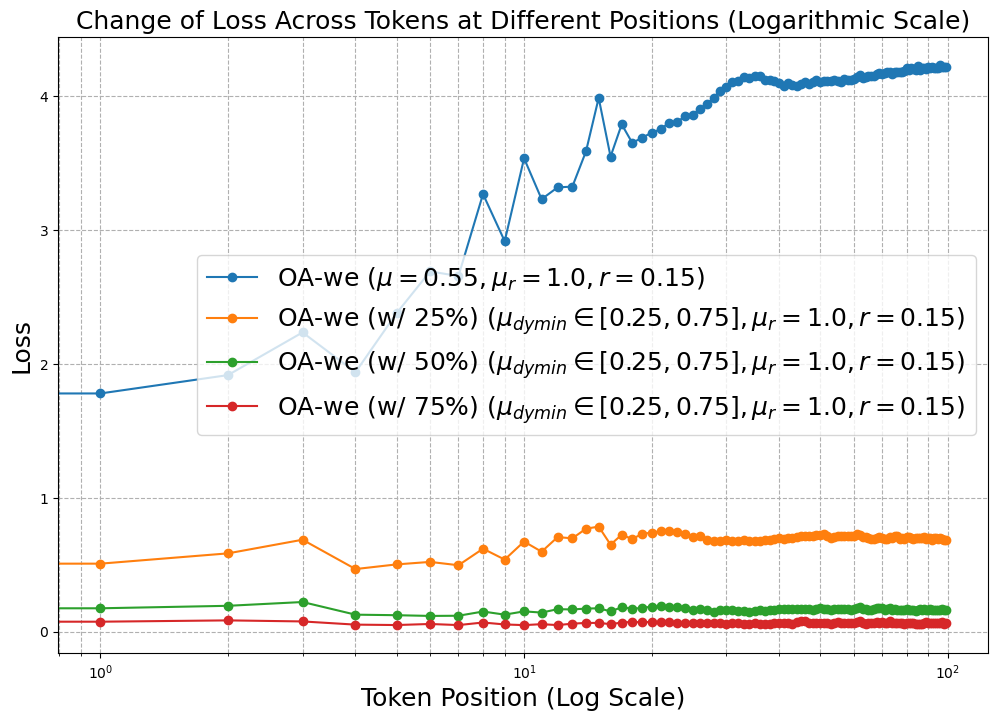

In [21]:
fname11 = f'{DIR}/oa-denoiseonline-mu0.25to0.75-dymin-rmu1.0-r0.15/losses.json'
fname21 = f'{DIR}/oa-denoiseonline-mu0.25to0.75-dymin-rmu1.0-r0.15/losses_ratio0.75.json'
fname22 = f'{DIR}/oa-denoiseonline-mu0.25to0.75-dymin-rmu1.0-r0.15/losses_ratio0.5.json'
fname23 = f'{DIR}/oa-denoiseonline-mu0.25to0.75-dymin-rmu1.0-r0.15/losses_ratio0.25.json'
# fname13 = f'{DIR}/oa-base-mu0.25to0.75/losses.json'
draw_curve([
                fname11, 
                fname21,
                fname22,
                fname23,
            ], 
           [
               r'OA-we ($\mu=0.55, \mu_{r}=1.0, r=0.15$)', 
               r'OA-we (w/ $25$%) ($\mu_{dymin}\in[0.25,0.75], \mu_{r}=1.0, r=0.15$)', 
               r'OA-we (w/ $50$%) ($\mu_{dymin}\in[0.25,0.75], \mu_{r}=1.0, r=0.15$)', 
               r'OA-we (w/ $75$%) ($\mu_{dymin}\in[0.25,0.75], \mu_{r}=1.0, r=0.15$)', 
           ])

## V0705

In [2]:
DIR = "/share/edc/home/yuxi_xie/oa_dag/checkpoints/v0705"

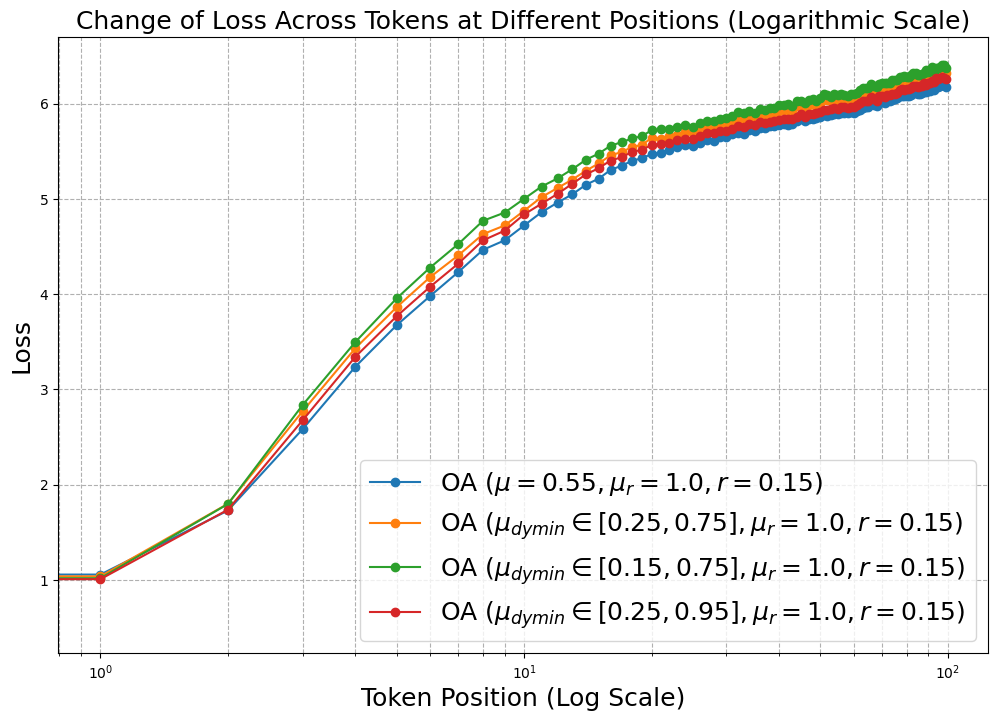

In [9]:
fname11 = f'{DIR}/oa-base-mu0.55/losses.json'
fname12 = f'{DIR}/oa-base-mu0.55-min0/losses.json'
fname13 = f'{DIR}/oa-base-mu0.25to0.75/losses.json'
fname14 = f'{DIR}/oa-base-mu0.25to0.75-dymin/losses.json'

fname21 = f'{DIR}/oa-denoise-mu0.55/losses.json'
fname22 = f'{DIR}/oa-denoise-mu0.55-rmu0.15-r0.5/losses.json'
fname23 = f'{DIR}/oa-denoise-mu0.55-rmu1.0-r0.15/losses.json'
fname24 = f'{DIR}/oa-denoise-mu0.25to0.75-dymin-rmu0.15-r0.5/losses.json'

fname31 = f'{DIR}/oa-denoise-mu0.25to0.75-dymin-rmu1.0-r0.15/losses.json'
fname32 = f'{DIR}/oa-denoise-mu0.15to0.75-dymin-rmu1.0-r0.15/losses.json'
fname33 = f'{DIR}/oa-denoise-mu0.25to0.95-dymin-rmu1.0-r0.15/losses.json'

fname41 = f'{DIR}/oa-denoiseonline-mu0.25to0.75-dymin-rmu1.0-r0.15/losses.json'
fname42 = f'{DIR}/oa-denoiseonline-mu0.55-rmu1.0-r0.15/losses.json'
draw_curve([
            # fname11, 
            # fname12, 
            # fname13, 
            # fname14, 
            
            # fname21, 
            # fname22, 
            fname23,
            # fname24,
            
            fname31,
            fname32,
            fname33,
            
            # fname41,
            # fname42,
            ], 
           [
            # r'OA ($\mu=0.55$)',
            # r'OA ($\mu_{min=0}=0.55$)', 
            # r'OA ($\mu\in[0.25,0.75]$)',
            # r'OA ($\mu_{dymin}\in[0.25,0.75]$)', 
            
            # r'OA ($\mu=0.55, \mu_{r}=0.15$)', 
            # r'OA ($\mu=0.55, \mu_{r}=0.15, r=0.5$)', 
            r'OA ($\mu=0.55, \mu_{r}=1.0, r=0.15$)', 
            # r'OA ($\mu_{dymin}\in[0.25,0.75], \mu_{r}=0.15, r=0.5$)',
            
            r'OA ($\mu_{dymin}\in[0.25,0.75], \mu_{r}=1.0, r=0.15$)',
            r'OA ($\mu_{dymin}\in[0.15,0.75], \mu_{r}=1.0, r=0.15$)',
            r'OA ($\mu_{dymin}\in[0.25,0.95], \mu_{r}=1.0, r=0.15$)',
            
            # r'OA-we ($\mu_{dymin}\in[0.25,0.75], \mu_{r}=1.0, r=0.15$)', 
            # r'OA-we ($\mu=0.55, \mu_{r}=1.0, r=0.15$)', 
            ])

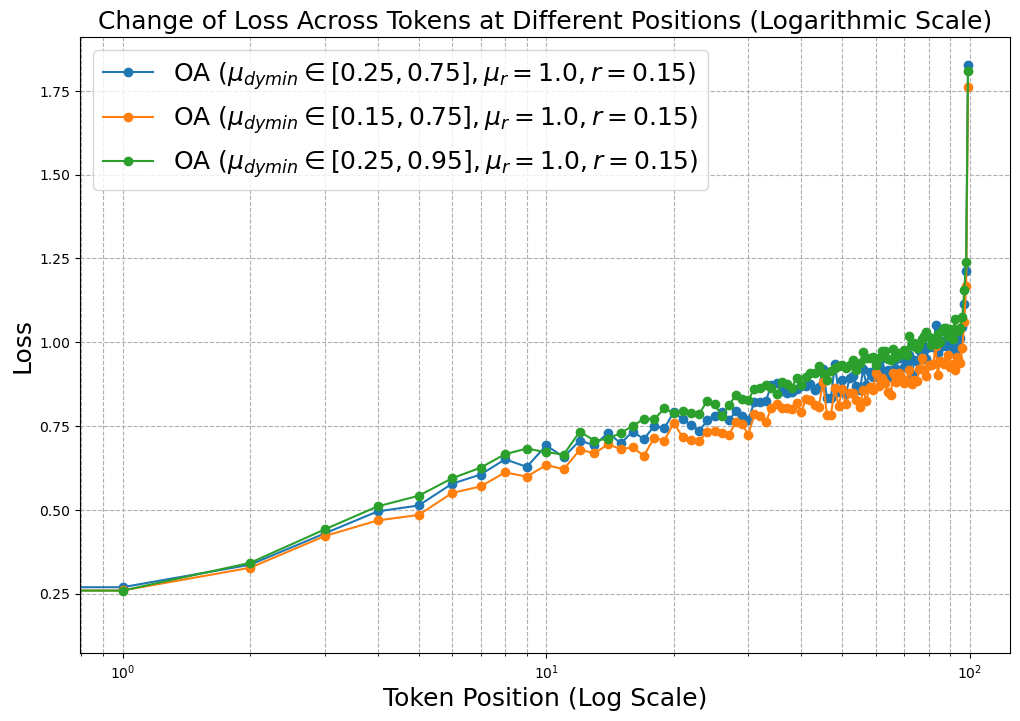

In [13]:
prob = 0.25

fname11 = f'{DIR}/oa-base-mu0.55/losses_ratio{prob}.json'
fname12 = f'{DIR}/oa-base-mu0.55-min0/losses_ratio{prob}.json'
fname13 = f'{DIR}/oa-base-mu0.25to0.75/losses_ratio{prob}.json'
fname14 = f'{DIR}/oa-base-mu0.25to0.75-dymin/losses_ratio{prob}.json'

fname21 = f'{DIR}/oa-denoise-mu0.55/losses_ratio{prob}.json'
fname22 = f'{DIR}/oa-denoise-mu0.55-rmu0.15-r0.5/losses_ratio{prob}.json'
fname23 = f'{DIR}/oa-denoise-mu0.55-rmu1.0-r0.15/losses_ratio{prob}.json'
fname24 = f'{DIR}/oa-denoise-mu0.25to0.75-dymin-rmu0.15-r0.5/losses_ratio{prob}.json'

fname31 = f'{DIR}/oa-denoise-mu0.25to0.75-dymin-rmu1.0-r0.15/losses_ratio{prob}.json'
fname32 = f'{DIR}/oa-denoise-mu0.15to0.75-dymin-rmu1.0-r0.15/losses_ratio{prob}.json'
fname33 = f'{DIR}/oa-denoise-mu0.25to0.95-dymin-rmu1.0-r0.15/losses_ratio{prob}.json'

fname41 = f'{DIR}/oa-denoiseonline-mu0.25to0.75-dymin-rmu1.0-r0.15/losses_ratio{prob}.json'
fname42 = f'{DIR}/oa-denoiseonline-mu0.55-rmu1.0-r0.15/losses_ratio{prob}.json'
draw_curve([
            # fname11, 
            # fname12, 
            # fname13, 
            # fname14, 
            
            # fname21, 
            # fname22, 
            # fname23,
            # fname24,
            
            fname31,
            fname32,
            fname33,
            
            # fname41,
            # fname42,
            ], 
           [
            # r'OA ($\mu=0.55$)',
            # r'OA ($\mu_{min=0}=0.55$)', 
            # r'OA ($\mu\in[0.25,0.75]$)',
            # r'OA ($\mu_{dymin}\in[0.25,0.75]$)', 
            
            # r'OA ($\mu=0.55, \mu_{r}=0.15$)', 
            # r'OA ($\mu=0.55, \mu_{r}=0.15, r=0.5$)', 
            # r'OA ($\mu=0.55, \mu_{r}=1.0, r=0.15$)', 
            # r'OA ($\mu_{dymin}\in[0.25,0.75], \mu_{r}=0.15, r=0.5$)',
            
            r'OA ($\mu_{dymin}\in[0.25,0.75], \mu_{r}=1.0, r=0.15$)',
            r'OA ($\mu_{dymin}\in[0.15,0.75], \mu_{r}=1.0, r=0.15$)',
            r'OA ($\mu_{dymin}\in[0.25,0.95], \mu_{r}=1.0, r=0.15$)',
            
            # r'OA-we ($\mu_{dymin}\in[0.25,0.75], \mu_{r}=1.0, r=0.15$)', 
            # r'OA-we ($\mu=0.55, \mu_{r}=1.0, r=0.15$)', 
            ])

## Previous V0628

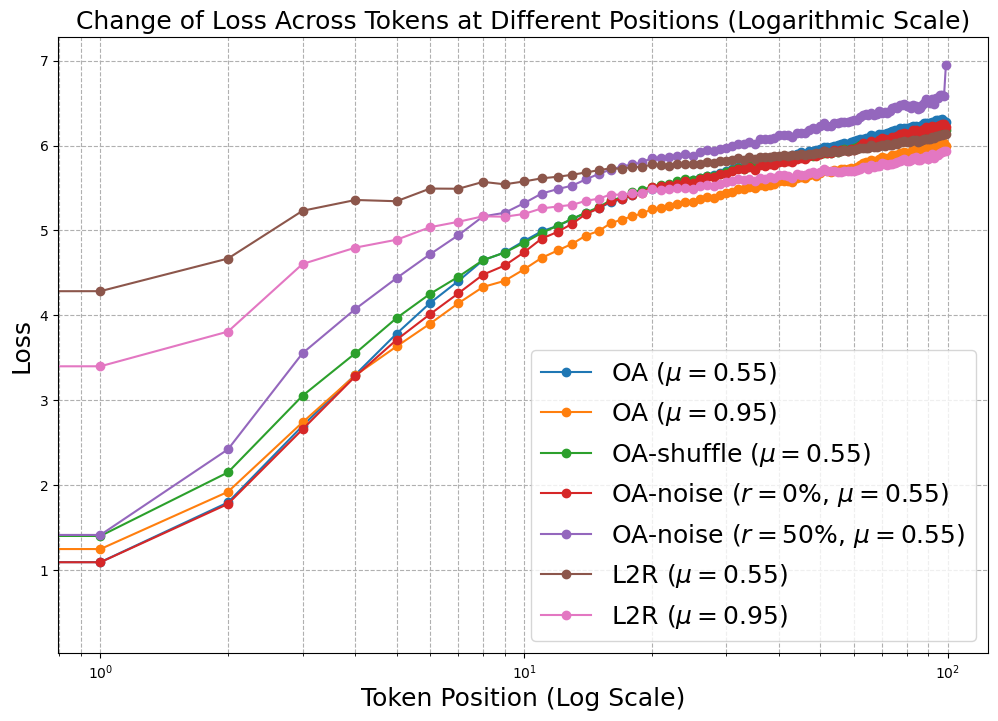

In [12]:
fname11 = f'{DIR}/mage-llm-consecutive/losses.json'
fname12 = f'{DIR}/mage-llm-consecutive-mu95/losses.json'
fname21 = f'{DIR}/mage-llm/losses.json'
fname31 = f'{DIR}/mage-llm-shuffle/losses.json'
fname22 = f'{DIR}/mage-llm-mu95/losses.json'
fname41 = f'{DIR}/mage-llm-replace/losses.json'
fname42 = f'{DIR}/mage-llm-replace-prob0.5/losses.json'
draw_curve([fname21, fname22, fname31, fname41, fname42, fname11, fname12], [r'OA ($\mu=0.55$)', r'OA ($\mu=0.95$)', r'OA-shuffle ($\mu=0.55$)', r'OA-noise ($r=0\%$, $\mu=0.55$)', r'OA-noise ($r=50\%$, $\mu=0.55$)', r'L2R ($\mu=0.55$)', r'L2R ($\mu=0.95$)'])

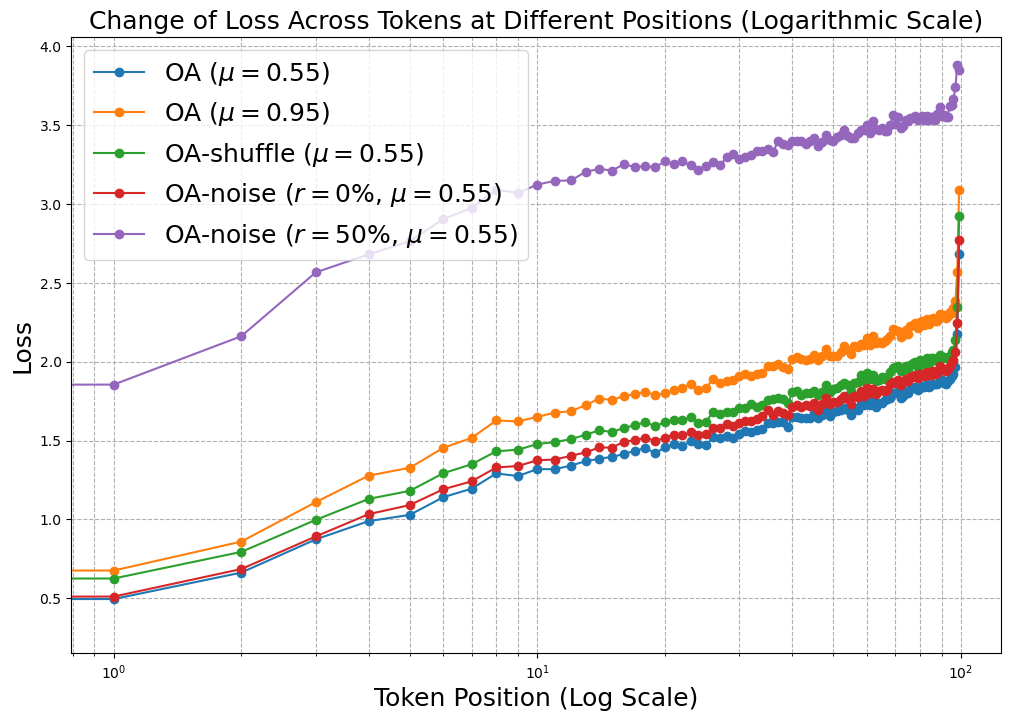

In [13]:
# fname11 = f'{DIR}/mage-llm-consecutive/losses_ratio0.5.json'
# fname12 = f'{DIR}/mage-llm-consecutive-mu95/losses_ratio0.5.json'
# fname21 = f'{DIR}/mage-llm/losses_ratio0.5.json'
# fname31 = f'{DIR}/mage-llm-shuffle/losses_ratio0.5.json'
# fname22 = f'{DIR}/mage-llm-mu95/losses_ratio0.5.json'
# draw_curve([fname11, fname12, fname21, fname22, fname31], [r'L2R ($\mu=0.55$)', r'L2R ($\mu=0.95$)', r'OA ($\mu=0.55$)', r'OA ($\mu=0.95$)', 'OA-shuffle'])

fname21 = f'{DIR}/mage-llm/losses_ratio0.5.json'
fname31 = f'{DIR}/mage-llm-shuffle/losses_ratio0.5.json'
fname22 = f'{DIR}/mage-llm-mu95/losses_ratio0.5.json'
fname41 = f'{DIR}/mage-llm-replace/losses_ratio0.5.json'
fname42 = f'{DIR}/mage-llm-replace-prob0.5/losses_ratio0.5.json'
# draw_curve([fname21, fname22, fname31, fname11, fname12, fname41], [r'OA ($\mu=0.55$)', r'OA ($\mu=0.95$)', 'OA-shuffle', r'L2R ($\mu=0.55$)', r'L2R ($\mu=0.95$)', r'OA-noise ($0\%$)'])
draw_curve([fname21, fname22, fname31, fname41, fname42], [r'OA ($\mu=0.55$)', r'OA ($\mu=0.95$)', r'OA-shuffle ($\mu=0.55$)', r'OA-noise ($r=0\%$, $\mu=0.55$)', r'OA-noise ($r=50\%$, $\mu=0.55$)'])

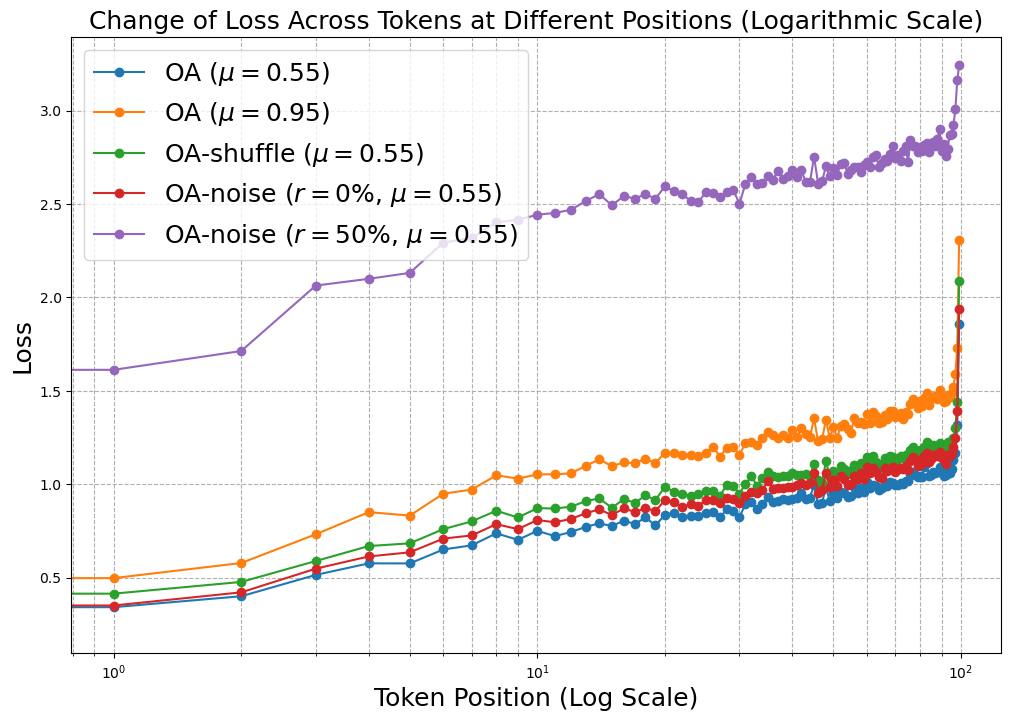

In [16]:
# fname11 = f'{DIR}/mage-llm-consecutive/losses_ratio0.25.json'
# fname12 = f'{DIR}/mage-llm-consecutive-mu95/losses_ratio0.25.json'
# fname21 = f'{DIR}/mage-llm/losses_ratio0.25.json'
# fname31 = f'{DIR}/mage-llm-shuffle/losses_ratio0.25.json'
# fname22 = f'{DIR}/mage-llm-mu95/losses_ratio0.25.json'
# draw_curve([fname11, fname12, fname21, fname22, fname31], [r'L2R ($\mu=0.55$)', r'L2R ($\mu=0.95$)', r'OA ($\mu=0.55$)', r'OA ($\mu=0.95$)', 'OA-shuffle'])

fname21 = f'{DIR}/mage-llm/losses_ratio0.25.json'
fname31 = f'{DIR}/mage-llm-shuffle/losses_ratio0.25.json'
fname22 = f'{DIR}/mage-llm-mu95/losses_ratio0.25.json'
fname41 = f'{DIR}/mage-llm-replace/losses_ratio0.25.json'
fname42 = f'{DIR}/mage-llm-replace-prob0.5/losses_ratio0.25.json'
draw_curve([fname21, fname22, fname31, fname41, fname42], [r'OA ($\mu=0.55$)', r'OA ($\mu=0.95$)', r'OA-shuffle ($\mu=0.55$)', r'OA-noise ($r=0\%$, $\mu=0.55$)', r'OA-noise ($r=50\%$, $\mu=0.55$)'])

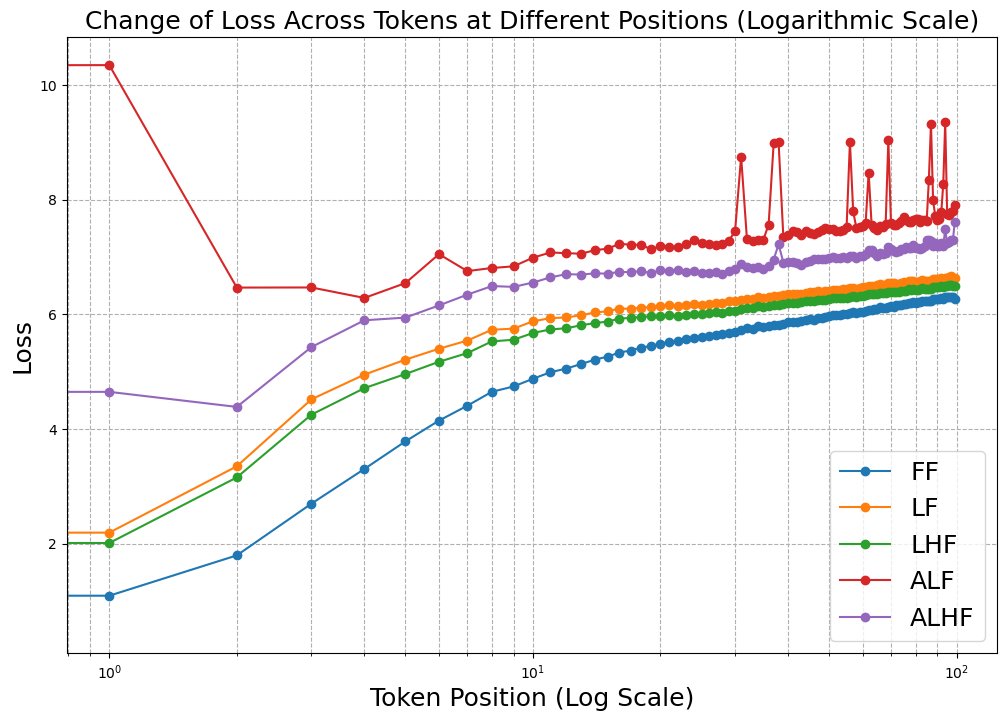

In [14]:
fname1 = f'{DIR}/mage-llm/losses.json'
fname2 = f'{DIR}/finallayer/mage-llm-finallayer/losses.json'
fname3 = f'{DIR}/finallayer/mage-llm-finallayer_lmhead/losses.json'
fname4 = f'{DIR}/addfinallayer/mage-llm-addfinallayer/losses.json'
fname5 = f'{DIR}/addfinallayer/mage-llm-addfinallayer_lmhead/losses.json'
draw_curve([fname1, fname2, fname3, fname4, fname5], ['FF', 'LF', 'LHF', 'ALF', 'ALHF'])

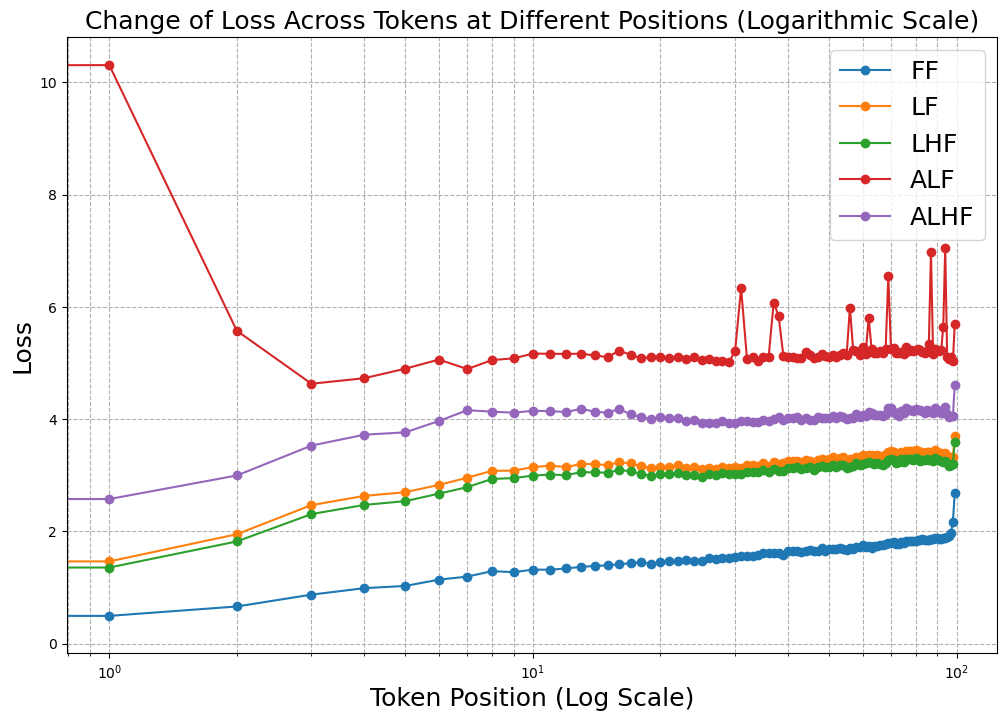

In [17]:
fname1 = f'{DIR}/mage-llm/losses_ratio0.5.json'
fname2 = f'{DIR}/finallayer/mage-llm-finallayer/losses_ratio0.5.json'
fname3 = f'{DIR}/finallayer/mage-llm-finallayer_lmhead/losses_ratio0.5.json'
fname4 = f'{DIR}/addfinallayer/mage-llm-addfinallayer/losses_ratio0.5.json'
fname5 = f'{DIR}/addfinallayer/mage-llm-addfinallayer_lmhead/losses_ratio0.5.json'
draw_curve([fname1, fname2, fname3, fname4, fname5], ['FF', 'LF', 'LHF', 'ALF', 'ALHF'])

In [76]:
decoding_tracks = json_load(f'{DIR}/mage-llm/decoding_tracks_step_sample3.json')

In [1]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(
    'mistralai/Mistral-7B-Instruct-v0.2',
)

/share/edc/home/yuxi_xie/miniconda3/envs/oa-dag/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
tokenizer.decode([1, 733, 16289, 28793, 28705, 28740, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28734, 28787, 28725, 28782, 28770, 28770, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28734, 28774, 28725, 28782, 28774, 28774, 13, 28737, 1419, 369, 2511, 297, 1411, 13, 13, 28750, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28740, 28734, 28725, 28740, 28734, 28734, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28740, 28740, 28725, 28781, 28784, 28784, 13, 278, 4407, 5413, 13, 13, 28770, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28740, 28750, 28725, 28734, 28734, 28734, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28740, 28770, 28725, 28787, 28734, 28734, 13, 370, 1503, 368, 1388, 14679, 13, 13, 28781, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28740, 28781, 28725, 28781, 28734, 28734, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28740, 28782, 28725, 28750, 28734, 28734, 13, 28711, 5182, 13, 13, 28782, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28740, 28784, 28725, 28770, 28784, 28784, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28740, 28774, 28725, 28774, 28770, 28770, 13, 28759, 14814, 14572, 4403, 773, 736, 349, 708, 8773, 298, 347, 1419, 13, 13, 28784, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28750, 28734, 28725, 28740, 28770, 28770, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28750, 28740, 28725, 28781, 28784, 28784, 13, 1674, 288, 1741, 13, 13, 28787, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28750, 28740, 28725, 28783, 28784, 28784, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28750, 28781, 28725, 28734, 28784, 28784, 13, 262, 4641, 1905, 354, 264, 1411, 369, 28742, 28713, 2108, 13, 13, 28783, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28750, 28781, 28725, 28781, 28734, 28734, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28750, 28784, 28725, 28782, 28784, 28784, 13, 23018, 272,624, 368, 28742, 267, 10637, 302, 3687, 13, 13, 28774, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28750, 28787, 28725, 28770, 28734, 28734, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28750, 28774, 28725, 28770, 28734, 28734, 13, 3306, 315, 28742, 28719, 1864, 297, 574, 9021, 297, 2052, 13, 13, 28740, 28734, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28750, 28774, 28725, 28770, 28734, 28734, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28770, 28734, 28725, 28783, 28784, 28784, 13, 391, 14893, 298, 6302, 304, 13, 13, 28740, 28740, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28770, 28734, 28725, 28774, 28734, 28734, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28770, 28740, 28725, 28787, 28784, 28784, 13, 28720, 16402, 574, 3014, 13, 13, 28740, 28750, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28770, 28740, 28725, 28787, 28784, 28784, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28770, 28770, 28725, 28770, 28784, 28784, 13, 391, 24568, 767, 368, 947, 298, 511, 395, 13, 13, 28740, 28770, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28770, 28770, 28725, 28770, 28784, 28784, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28770, 28782, 28725, 28782, 28770, 28770, 13, 4091, 315, 28742, 28719, 1864, 905, 506, 2240, 368, 13, 13, 28740, 28781, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28770, 28782, 28725, 28782, 28784, 28784, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28770, 28787, 28725, 28783, 28784, 28784, 13, 532, 1038, 1864, 368, 506, 1545, 298, 2949, 852, 356, 13, 13, 28740, 28782, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28770, 28783, 28725, 28734, 28784, 28784, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28781, 28734, 28725, 28740, 28784, 28784, 13, 6539, 1864, 368, 1433, 1545, 298, 2949, 852, 356, 18411, 13, 13, 28740, 28784, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28781, 28740, 28725, 28770, 28770, 28770, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28781, 28770, 28725, 28781, 28784, 28784, 13, 2391, 315, 1484, 8988, 369, 5935, 13, 13, 28740, 28787, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28781, 28770, 28725, 28783, 28784, 28784, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28781, 28782, 28725, 28784, 28784, 28784, 13, 28716, 1652, 1545, 298, 2949, 852, 356, 13, 13, 28740, 28783, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28781, 28784, 28725, 28783, 28784, 28784, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28781, 28783, 28725, 28770, 28770, 28770, 13, 335, 315, 28742, 28719, 1404, 298, 2949, 13, 13, 28740, 28774, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28781, 28774, 28725, 28770, 28770, 28770, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28782, 28740, 28725, 28781, 28774, 28774, 13, 28737, 949, 28742, 28707, 947, 298, 2949, 852, 356, 2424, 13, 13, 28750, 28734, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28782, 28740, 28725, 28774, 28734, 28734, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28782, 28770, 28725, 28781, 28784, 28784, 13, 28737, 947, 298, 2949, 3814, 13, 13, 28750, 28740, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28782, 28781, 28725, 28770, 28784, 28784, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28782, 28782, 28725, 28782, 28770, 28770, 13, 28737, 5248, 438, 2429, 456, 1069, 13, 13, 28750, 28750, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28782, 28782, 28725, 28782, 28770, 28770, 6998, 28705, 28734, 28734, 28747, 28734, 28734, 28747, 28782, 28787, 28725, 28740, 28770, 28770, 13, 28737, 28742, 584, 1032, 767,315, 28742, 28719, 1404, 298, 4067, 13, 13, 28750, 28770, 13, 28734, 28734, 28747, 28734, 28734, 28747, 28782, 28774, 28725, 28770, 28770, 28770, 6998, 28705, 28734, 28734, 28747, 28734, 28740, 28747, 28734, 28734, 28725, 28784, 28774, 28774, 13, 20795, 23074, 13, 13, 28750, 28781, 13, 28734, 28734, 28747, 28734, 28740, 28747, 28734, 28740, 28725, 28770, 28734, 28734, 6998, 28705, 28734, 28734, 28747, 28734, 28740, 28747, 28734, 28750, 28725, 28782, 28784, 28784, 13, 7020, 28742, 584, 1484, 7446, 13, 13, 28750, 28782, 13, 28734, 28734, 28747, 28734, 28740, 28747, 28734, 28781, 28725, 28782, 28734, 28734, 6998, 28705, 28734, 28734, 28747, 28734, 28740, 28747, 28734, 28787, 28725, 28784, 28784, 28784, 13, 667, 511, 767, 368, 1601, 20640, 684, 20640, 684, 13, 13, 28750, 28784, 13, 28734, 28734, 28747, 28734, 28740, 28747, 28734, 28783, 28725, 28740, 28734, 28734, 6998, 28705, 28734, 28734, 28747, 28734, 28740, 28747, 28734, 28774, 28725, 28782, 28770, 28770, 13, 20985, 14562, 13, 13, 28750, 28787, 13, 28734, 28734, 28747, 28734, 28740, 28747, 28740, 28734, 28725, 28774, 28770, 28770, 6998, 28705, 28734, 28734, 28734] )

"<s> [INST] 1\n00:00:07,533 --> 00:00:09,599\nI found that nothing in life\n\n2\n00:00:10,100 --> 00:00:11,466\nis worthwhile\n\n3\n00:00:12,000 --> 00:00:13,700\nunless you take risks\n\n4\n00:00:14,400 --> 00:00:15,200\nnothing\n\n5\n00:00:16,366 --> 00:00:19,933\nNelson Mandela said there is no passion to be found\n\n6\n00:00:20,133 --> 00:00:21,466\nplaying small\n\n7\n00:00:21,866 --> 00:00:24,066\nin settling for a life that's less\n\n8\n00:00:24,400 --> 00:00:26,566\nthan the one you're capable of living\n\n9\n00:00:27,300 --> 00:00:29,300\nnow I'm sure in your experiences in school\n\n10\n00:00:29,300 --> 00:00:30,866\nand applying to college and\n\n11\n00:00:30,900 --> 00:00:31,766\npicking your major\n\n12\n00:00:31,766 --> 00:00:33,366\nand deciding what you want to do with\n\n13\n00:00:33,366 --> 00:00:35,533\nlike I'm sure people have told you\n\n14\n00:00:35,566 --> 00:00:37,866\nto make sure you have something to fall back on\n\n15\n00:00:38,066 --> 00:00:40,166\nmake su

In [79]:
idx = 3
print(decoding_tracks['outputs'][idx])
for i in range(len(decoding_tracks['tracks'][idx])):
    # if i < 50: continue
    start_idx = min(decoding_tracks['tracks'][idx][i][1])
    end_idx = max(decoding_tracks['tracks'][idx][i][1])
    print(tokenizer.decode([decoding_tracks['tracks'][idx][i][0][decoding_tracks['tracks'][idx][i][1].index(x)] if x in decoding_tracks['tracks'][idx][i][1] else 583 for x in range(start_idx, end_idx + 1)]))
    # print(''.join([tokenizer.decode([decoding_tracks['tracks'][idx][i][0][decoding_tracks['tracks'][idx][i][1].index(x)]]) if x in decoding_tracks['tracks'][idx][i][1] else '_' for x in range(start_idx, end_idx + 1)]))
    # print(decoding_tracks['tracks'][idx][i])

[INST] Are those all the equations in our model? [/INST] I cannot definitively answer that question without referring knowing which specific model you are referring to. The equations of a model can a simple range of equations and equations, and a complex and equations. The equations model. If you could provide me the name of the model or description, I could a look list of the equations, but let me to to to the model.. If,, the the list of all all equations in the model, including the model, a model is not
cannot
cannot definit
I cannot definit _ answer
I cannot definit _ answer _ question without _ knowing
I cannot definitively answer _ question without _ knowing which specific
I cannot definitively answer that question without _ knowing which specific model you
I cannot definitively answer that question without referring knowing which specific model you are _ to
I cannot definitively answer that question without referring knowing which specific model you are referring to. _ _ _ _ mod

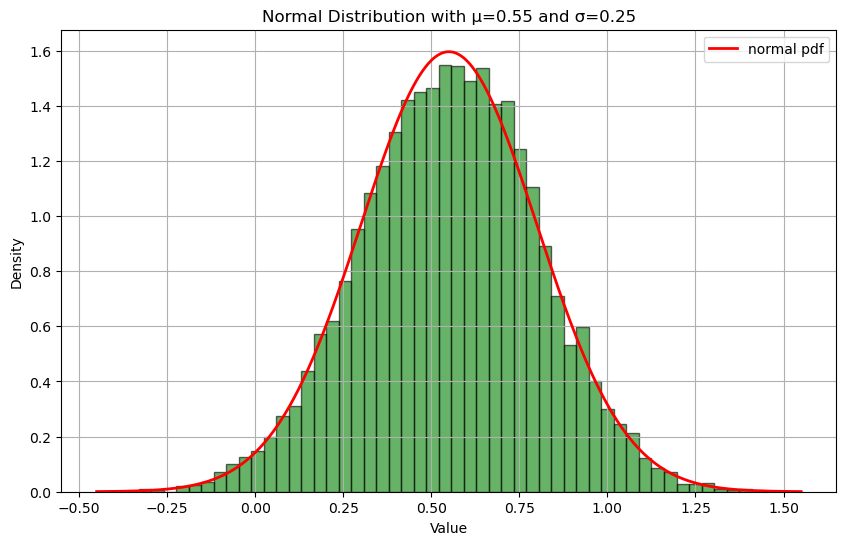

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distribution
mu = 0.55
std = 0.25

# Generate sample values
samples = np.random.normal(mu, std, 10000)

# Plot the histogram of the samples
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the theoretical PDF
x = np.linspace(mu - 4*std, mu + 4*std, 1000)
plt.plot(x, norm.pdf(x, mu, std), 'r-', lw=2, label='normal pdf')

plt.title(f'Normal Distribution with μ={mu} and σ={std}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
